# Intro to Inferential Statistics:  Structure of the Central Limit Theorem

In [8]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import random
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
!pip install celluloid

In [10]:
from IPython.display import HTML
from celluloid import Camera

### Generating a population

We  artificially generate 10,000 random observations that follow a made up distribution with a weird shape. This is going to be our population.

To take samples from a given distribution, we use the scipy stats module: scipy.stats. Then we specify the intended distribution and use the `rvs` function with the appropriate arguments.

Note: we generally don't have access to data for the entire population. Here, we construct the population by hand to demonstrate certain concepts for learning purposes.

In [11]:
# some of the observations follow an exponential dist
r1 = stats.expon.rvs(size=10000, random_state=1000)

# some follow a normal dist. loc = mean, scale = sigma
r2 = stats.norm.rvs(loc=2, scale=1.5, size=10000, random_state=847)

# some follow a constant dist: loc = min_value, scale = b - a
r3 = stats.uniform.rvs(loc=-2, scale=9, size=10000, random_state=128)

# there's a weird spike at some point
r4 = stats.uniform.rvs(loc=5.5, scale=1, size=10000, random_state=128)

pop = pd.Series(np.concatenate([r1, r2, r3, r4]))

Here's the distribution of our population:

<AxesSubplot:>

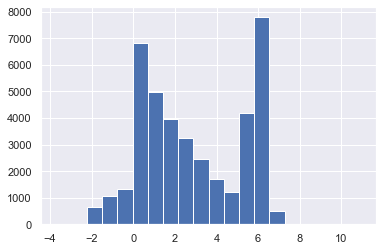

In [12]:
sns.set_theme()
pop.hist(bins=20)

In [13]:
# Population mean:
pop_mean = np.mean(pop)# 
print("Population mean: {:.2f}".format(pop_mean))

Population mean: 2.88


In [14]:
# Population standard deviation:
pop_std = np.std(pop)# 
# np.std by default assumes that you are computing the POPULATION standard deviation, therefore divides by n.
# if you are computing the SAMPLE standard deviation, you need to divide by n - 1 to get an unbiased estimation.
# in order to do this, set the optional parameter ddof = 1.
print("Population standard deviation: {:.2f}".format(pop_std))

Population standard deviation: 2.47


Let's take a sample from our population. The mean of the sample is similar but not equal to the mean of the population. By the way, the mean of the sample is called... well, **sample mean**.

In [19]:
# sample of size 50. Use sample()
sample = np.random.choice(pop,size=50)#
#sample = pop.sample(50)
sample

array([-1.1267336 ,  4.8355714 ,  1.78100705,  0.75366681,  5.55640528,
       -1.91644478,  4.31793465, -0.74615724,  0.76581785,  6.09229596,
        0.52551469,  6.0929398 ,  0.04861313,  1.21829056,  0.61830263,
        6.02564714,  4.52637813,  3.53405471,  1.07800416,  5.89864903,
        6.42356755,  0.79430188,  1.47373307,  4.1183676 ,  3.31201672,
        5.05975978,  1.79633444,  5.88010119,  2.69341523,  6.20767759,
        0.73863906,  1.00198751,  5.76843518, -0.95047122,  0.28515713,
        0.9119128 ,  1.44906535,  0.73933579,  0.44116776,  2.6947372 ,
        6.39245021,  0.09376876,  5.89553171,  1.25313596,  2.67145401,
        1.24633081,  4.18573289,  5.44750877,  2.32363373,  1.56225315])

Let's compare our sample mean with the population mean and get the sampling error for the mean.

In [20]:
# Comparing the population mean and the sample mean.
# Population mean
print("Population mean: {:.2f}".format(pop_mean))

# Sample mean
print("Sample mean: {:.2f}".format(np.mean(sample)))

# Sampling error of the mean
print("Sampling error: {:.2f}".format(np.mean(sample) - pop_mean))

Population mean: 2.88
Sample mean: 2.64
Sampling error: -0.24


In [21]:
# Comparing standard deviations
# Population
print("Population standard deviation {:.2f}".format(pop_std))

# The same happens with the sample standard deviation. Remember that you are using a SAMPLE!
# therefore, you need to divide by n - 1. Here we use the parameter ddof = 1.
print("Sample standard deviation {:.2f}".format(np.std(sample, ddof=1)))

# Sampling error of the standard deviation
print("Sampling error: {:.2f}".format(np.std(sample, ddof=1) - pop_std))

Population standard deviation 2.47
Sample standard deviation 2.42
Sampling error: -0.06


If we take a diferent sample, the parameters will vary:

In [22]:
# sample of size n
n = 50
sample = pop.sample(n, random_state=314159)

# sample mean
print("Sample mean: {:.2f}".format(np.mean(sample)))

Sample mean: 3.02


# Inspecting the histogram of sample means

Now we take 1000 samples, each one of size 50.
Some means $\bar{x}$ will be lower than the population mean, while others will be higher. However, according to the `Central Limit Theorem` the histogram of those means, will resemble a Normal distribution with the same mean as the `population mean` $\mu$ 

$$\bar{x}\approx N(\mu,\frac{\sigma_{\bar{x}}}{\sqrt{n}})$$

/var/folders/lj/my6r3k650wl54v5nz5r6x5cm0000gn/T/ipykernel_30826/1922886863.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  means = means.append({'mean_of_means': sample_mean}, ignore_index=True)
/var/folders/lj/my6r3k650wl54v5nz5r6x5cm0000gn/T/ipykernel_30826/1922886863.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  means = means.append({'mean_of_means': sample_mean}, ignore_index=True)
/var/folders/lj/my6r3k650wl54v5nz5r6x5cm0000gn/T/ipykernel_30826/1922886863.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  means = means.append({'mean_of_means': sample_mean}, ignore_index=True)
/var/folders/lj/my6r3k650wl54v5nz5r6x5cm0000gn/T/ipykernel_30826/1922886863.py:21: FutureWarning: The frame.append method is depre

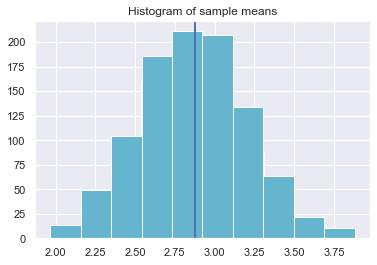

In [23]:
sns.set_theme()

sample_means = []
# Dataframe to contain the mean of each sample
means = pd.DataFrame({'mean_of_means':[]})

fig = plt.figure()
camera = Camera(fig)

for number in range(1000): # We take 1.000 samples

    # Getting a sample of size 50 without replacemente with np.random.choice or sample
    sample = pop.sample(n)#

    # Computing the mean of the current sample
    sample_mean = np.mean(sample)#
    
    # Adding the mean of the current sample to the list of sample means
    sample_means.append(sample_mean)
    # Updating the dataframe of the means of all the samples
    means = means.append({'mean_of_means': sample_mean}, ignore_index=True)
    
    #plt.clf()
    plt.title("Histogram of sample means")
    plt.hist(means['mean_of_means'], color = 'c')
    plt.axvline(x=pop_mean)
    #plt.show()
    
    camera.snap()
    
animation = camera.animate() 


In [24]:
from IPython.display import HTML

HTML(animation.to_html5_video())

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '432x288', '-pix_fmt', 'rgba', '-r', '5.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/var/folders/lj/my6r3k650wl54v5nz5r6x5cm0000gn/T/tmpo7f9hlvw/temp.m4v']' returned non-zero exit status 255.

If the samples are large enough (rule of thumb: at least of size 30), the **sampling distribution ( the distribution of the mean of the sample means )** will ressemble a normal distribution. This is the essence of the **Central Limit Theorem**.

Otherwise, the sampling distribution will be a **t-student distribution**

This is not super important, but in case you wanna double check this distribution follows a normal distribution, you can use a "Quantile-quantile plot".

Learn more about qqplots here:
https://www.statisticshowto.com/q-q-plots/#:~:text=Q%20Q%20Plots%20 


((array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
         -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
         -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
         -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
         -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
         -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
         -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
         -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
         -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
         -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
         -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
         -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
         -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,

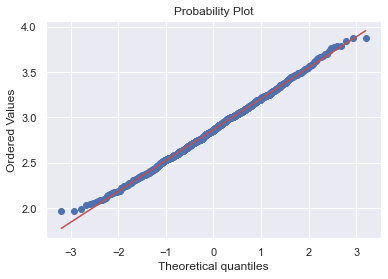

In [25]:
import scipy.stats as stats

stats.probplot(sample_means,dist="norm", plot=plt)

The mean of the sampling distribution of the sample means should be pretty close to the true mean of the population:

In [26]:
mean_sdsm = np.mean(sample_means)
print("Mean of all the sample means: {:.2f}".format(mean_sdsm))
print("Population mean: {:.2f}".format(pop_mean))
print("Difference: {:.2f}".format(pop_mean - mean_sdsm))

Mean of all the sample means: 2.87
Population mean: 2.88
Difference: 0.01


A difference of 0.01 is pretty good, but we can do even better!

In [27]:
#We know that for a normal distribution, 95% of the values fall within 2 standard deviations of the mean. Let's check that:

std_sdsm = np.std(sample_means) # std dev of the distribution of sample means

# The lower and upper bound of the interval that should contain
# ~95% of the sample means
lower_bound = mean_sdsm - 2*std_sdsm # mu - 2 sigma [for sample]
upper_bound = mean_sdsm + 2*std_sdsm # mu + 2 sigma [for sample]

print(round(lower_bound, 2), "-", round(upper_bound, 2))

2.19 - 3.55


In [30]:
# How many of the sample means fall within this interval?
count = 0
for i in sample_means:
    if ( i > lower_bound and i < upper_bound ):
        count +=1
print("Percentage of sample means within 2 std dev's of the mean = {:.2f}".format(count/len(sample_means)*100))

Percentage of sample means within 2 std dev's of the mean = 95.40


Another cool property of the sampling distribution of the sample means is that its *standard deviation* is equal to the standard deviation of the population divided by the square root of n. 

Let's see how this checks out with our data:

In [31]:
print("The standard deviation of all those sample means is: {:.2f}".format(std_sdsm))

The standard deviation of all those sample means is: 0.34


In [32]:
print("The standard deviation of all the sample means divided by the root square of n is: {:.2f}".format(pop_std/np.sqrt(n)))

The standard deviation of all the sample means divided by the root square of n is: 0.35


The *standard deviation of the sampling distribution of the sample means* is also called the **standard error of the mean** and we'll use it in the next lessons.

Before moving on, repeat the experiment with diferent sample sizes (both smaller and greater), and see what happens.

## Squirrels example

Let's assume that the population ('pop' values) represents the weights of squirrels. We go to the forest, take a sample of n=50 squirrels and register their weight:

In [36]:
squirrels = pop.sample(n, random_state=1990) # sample of 50 squirrel weights

<AxesSubplot:>

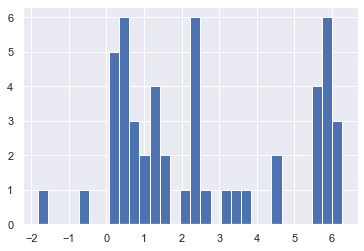

In [42]:
# distribution of the samples (we use a funny measuring scale for the weights which leads to negative values)
squirrels.hist(bins=30)

In [35]:
# We wonder if the mean of the weights of the squirrels is
# close to the 'true' mean of the population (which we can't measure)
print("The mean of the sample is: {:.2f}".format(np.mean(squirrels)))

The mean of the sample is: 2.57


The standard error $\sigma/\sqrt{N}$ of the mean is an estimate of how far the sample mean is likely to be from the population mean.

It is an estimate of the standard deviation of the distribution of the sample means, which, as we've seen, follows a normal distribution.

In [43]:
# standard error of the mean = sigma/sqrt(N)
np.std(squirrels)/np.sqrt(len(squirrels))

0.3229993534488167

In [33]:
# using scipy you can also calculate the standard error of the mean
stats.sem(squirrels, 
          ddof=0) # degrees of freedom. the default is 1, which results in a more conservative estimate

0.3229993534488167

The **Central Limit Theorem** tells us that, no matter the distribution of our sample or the population, the sampling distribution
of the sample mean is normal.

Knowing that, we can use the properties of the normal distribution to gain information about our sample and how much it differs from the true population.

In a normal distribution, 95% of the observations fall within 2 standard deviations of the mean.

Given the mean of the sample and the standard error, which is an estimate of the standard deviation of the sample means,
we can compute the **confidence interval**  to get a sense of the 'plausible range of values' for a population parameter (in this case, the mean).


In [47]:
# upper bound of the confidence interval
print("Upper bound of the population mean based on the sample mean with a 95% confidence interval: {:.2f}".format(np.mean(squirrels) + stats.sem(squirrels)*2)) # two standard deviations above

Upper bound of the population mean based on the sample mean with a 95% confidence interval: 3.23


In [49]:
# lower bound of the confidence interval
print("Lower bound of the population mean based on the sample mean with a 95% confidence interval: {:.2f}".format(np.mean(squirrels) - stats.sem(squirrels)*2)) # two standard deviations below

Lower bound of the population mean based on the sample mean with a 95% confidence interval: 1.92


In [53]:
# using scipy to calculate the confidence interval:
low, upp = stats.norm.interval(0.95, # the confidence level
                 loc=np.mean(squirrels), # mean of our sample
                 scale=stats.sem(squirrels)) # standard error of the mean

print("Upper bound to the population mean based on the sample mean with a 95% confidence interval: {:.2f}".format(upp)) # two standard deviations above
print("Lower bound to the population mean based on the sample mean with a 95% confidence interval: {:.2f}".format(low)) # two standard deviations below

Upper bound to the population mean based on the sample mean with a 95% confidence interval: 3.21
Lower bound to the population mean based on the sample mean with a 95% confidence interval: 1.93


In [52]:
# using a t distribution:
t_low, t_upp = stats.t.interval(0.95, # the confidence level
                                len(squirrels)-1, # degrees of freedom = sample size - 1
                                loc=np.mean(squirrels), # mean of our sample
                                scale=stats.sem(squirrels)) # standard error of the mean

print("Upper bound to the population mean based on the sample mean with a 95% confidence interval: {:.2f}".format(t_upp)) # two standard deviations above
print("Lower bound to the population mean based on the sample mean with a 95% confidence interval: {:.2f}".format(t_low)) # two standard deviations below

Upper bound to the population mean based on the sample mean with a 95% confidence interval: 3.23
Lower bound to the population mean based on the sample mean with a 95% confidence interval: 1.92


In the second interval we've used a t distribution, instead of a normal distribution, to get a more conservative estimate of the confidence intermal.

A t distribution is 'flatter' and has 'fat tails' for small populations, and is indistinguishable from a normal distribution for bigger populations.

The confidence interval is slightly thinner if we use a normal distribution.